https://www.kaggle.com/code/unfinishedgod/automl-h2o-practice-with-safe-driver-prediction

# Porto Seguros Safe Driver Prediction with Automl.h2o - Python Version

**Changes:**

- Ported R code to Python

- Fixed obvious errors

**TODO:**

- Check for other errors and potential improvements

owen

2020-04-30 23:56:12

1. About Automl h2o

2. Reference

3. Porto Seguro's Safe Driver Prediction

4. Preparation

5. Data Cleaning

6. Visualization

7. Modeling

8. Review

## 1. About Automl h2o

Let's use AutoML h2o to analyze the Porto Seguro's Safe Driver Prediction kaggle. In this time I learned how to use the Automl h2o in R, and it was a topic that I chose while looking for how to use it. There is a lot to be lacking in using the automatic h2o, so I refer to a lot of sites, refer to a Kaggle notebook, and write it down.

## 2. Reference

The following is a reference link in studying h2o automl and the source of the notebook that analyzed Porto Seguros Safe Driver Prediction using h2o automl in the Kaggle.

- H2O AutoML
    + H2O tutorials: h2o tutorials 
        - http://docs.h2o.ai/h2o-tutorials/latest-stable/index.html

- H2O AutoML & Kaggle
    + Troy Walters: h2o AutoML 
        - https://www.kaggle.com/captcalculator/h2o-automl
    + Bhavesh Ghodasara: AutoML (h2o) Trial 
        - https://www.kaggle.com/bhavesh09/automl-h2o-trial

- Kaggle
    + Heads or Tails: Steering Wheel of Fortune - Porto Seguro EDA 
        - https://www.kaggle.com/headsortails/steering-wheel-of-fortune-porto-seguro-eda
    + Troy Walters: A Very Extensive Porto Exploratory Analysis 
        - https://www.kaggle.com/captcalculator/a-very-extensive-porto-exploratory-analysis

## 3. Porto Seguro's Safe Driver Prediction

Now lets get down to Porto Seguros Safe Driver Prediction. The goal is to predict whether drivers will claim insurance next year through data.

https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction

### 3.1 Evaluation

The competition will be evaluated as a Normalized Gini Coefficant. First, to understand Gini Coeffient, it its as follows.

In economics, the Gini coefficient, sometimes called the Gini index or Gini ratio, is a measure of statistical dispersion intended to represent the income or wealth distribution of a nations residents, and is the most commonly used measurement of inequality. It was developed by the Italian statistician and sociologist Corrado Gini and published in his 1912 paper Variability and Mutability (Italian: Variabilità e mutabilità).

Economics_Gini_coefficient.svg.png

https://en.wikipedia.org/wiki/Gini_coefficient

### 3.2 Data overview

- Each column can be classified as follows:
    + ind
    + reg
    + car
    + calc

- The format of the data can be determined by the column name as follows:
    + `_bin`: Binary Features
    + `_cat`: Categorical Features
    + Etc: Continuous or Ordinal Features

- Values of "-1" indicate that the feature was missing from the observation

## 4. Preparation

### 4.1 Packages & Data load

In [1]:
import h2o
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

In [2]:
# train_set = pd.read_csv("train.csv")
# test_set = pd.read_csv("test.csv")
train_set = pd.read_csv("porto_train.csv")
test_set = pd.read_csv("porto_test.csv")

### 4.2 H2O init

First, connect h2o and R through the `h2oinit()` function.

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,13 hours 45 mins
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,"1 year, 4 months and 19 days !!!"
H2O_cluster_name:,H2O_from_python_stever7_uarlfn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,24.56 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"locked, healthy"


### 4.3 Data structure

#### 4.3.1 Data structure

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476170 entries, 0 to 476169
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              476170 non-null  int64  
 1   target          476170 non-null  int64  
 2   ps_ind_01       476170 non-null  int64  
 3   ps_ind_02_cat   476170 non-null  int64  
 4   ps_ind_03       476170 non-null  int64  
 5   ps_ind_04_cat   476170 non-null  int64  
 6   ps_ind_05_cat   476170 non-null  int64  
 7   ps_ind_06_bin   476170 non-null  int64  
 8   ps_ind_07_bin   476170 non-null  int64  
 9   ps_ind_08_bin   476170 non-null  int64  
 10  ps_ind_09_bin   476170 non-null  int64  
 11  ps_ind_10_bin   476170 non-null  int64  
 12  ps_ind_11_bin   476170 non-null  int64  
 13  ps_ind_12_bin   476170 non-null  int64  
 14  ps_ind_13_bin   476170 non-null  int64  
 15  ps_ind_14       476170 non-null  int64  
 16  ps_ind_15       476170 non-null  int64  
 17  ps_ind_16_

#### 4.3.2 Data summary

In [5]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,476170.0,743482.591251,429495.444791,9.000000,371335.750000,743071.500000,1.115286e+06,1.488021e+06
target,476170.0,0.036455,0.187421,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,476170.0,1.899899,1.983306,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,476170.0,1.358710,0.664186,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,476170.0,4.424136,2.699944,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,476170.0,0.416748,0.493328,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,476170.0,0.406115,1.351574,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,476170.0,0.393009,0.488419,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,476170.0,0.257272,0.437131,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,476170.0,0.164204,0.370461,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


## 5 Data Cleaning

Lets do a data cleanging. As mentioned, the data in "-1" is missing value, so lets change it to NA. And the `_cat` column allows you to change it to a factor format.

In [6]:
train_set = train_set.replace(-1, np.nan)
test_set = test_set.replace(-1, np.nan)

In [7]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,476170.0,743482.591251,429495.444791,9.000000,371335.750000,743071.500000,1.115286e+06,1.488021e+06
target,476170.0,0.036455,0.187421,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,476170.0,1.899899,1.983306,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,475996.0,1.359572,0.662775,1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,476170.0,4.424136,2.699944,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,476098.0,0.416962,0.493057,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,471560.0,0.419862,1.350960,0.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,476170.0,0.393009,0.488419,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,476170.0,0.257272,0.437131,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,476170.0,0.164204,0.370461,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


In [8]:
# cat_vars <- names(train_set)[grepl('_cat$', names(train_set))]

cat_vars = [col for col in train_set.columns if 'cat' in col]
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [9]:
# use "asfactor()" function after converting to H2O dataset

# train_set <- train_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

# test_set <- test_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

## 6 Visualization

### 6.1 Target visualiztion

Let's look at the target variable.

/tmp/ipykernel_50337/2922941003.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=target_cat, estimator=sum, ci=None, color="#D9230F", log=True)


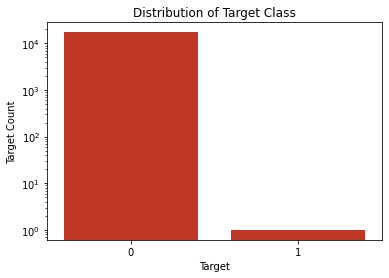

In [10]:
target_cat = pd.factorize(train_set["target"])

sns.barplot(data=target_cat, estimator=sum, ci=None, color="#D9230F", log=True)
plt.title("Distribution of Target Class")
plt.xlabel("Target")
plt.ylabel("Target Count")
plt.show()

*Obvious class imbalance concern that should be addressed, unless H2O automl automatically does that.*

### 6.2 Missing value

#### 6.2.1 Missing value visualiztion

Let's look at the missing value ratio. Only a few of the 59 columns have significant missing values.

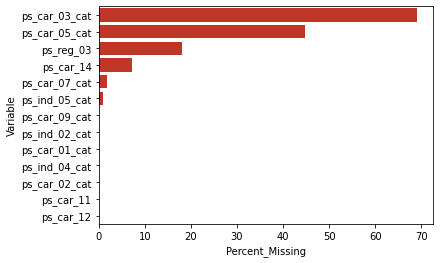

In [11]:
# http://theprofessionalspoint.blogspot.com/2019/03/visualize-missing-values-in-bar-plot.html
    
missing_values = 100 * train_set.isnull().sum() / len(train_set)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True, ascending=False)

missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Percent_Missing']
missing_values.index.names = ['Variable']
missing_values['Variable'] = missing_values.index

sns.barplot(y='Variable', x='Percent_Missing', data=missing_values, color="#D9230F")
plt.show()

#### 6.2.2 Missing value table

Let's take a closer look at the missing values of each column at the table. If you select only the top 10 and check it, it is as follows.

In [12]:
missing_values.drop(["Variable"], axis=1).reset_index()

,Variable,Percent_Missing
0,ps_car_03_cat,69.146313
1,ps_car_05_cat,44.808997
2,ps_reg_03,18.087238
3,ps_car_14,7.164248
4,ps_car_07_cat,1.915492
5,ps_ind_05_cat,0.968142
6,ps_car_09_cat,0.096184
7,ps_ind_02_cat,0.036542
8,ps_car_01_cat,0.019321
9,ps_ind_04_cat,0.015121


### 6.3 Correlation overview

#### 6.3.1 Correlation visualization

Let's draw a plot of the correlation between each data. There is a large number of data, so it doesn't mean much to display as a table, so let's just take a quick look at the graph.

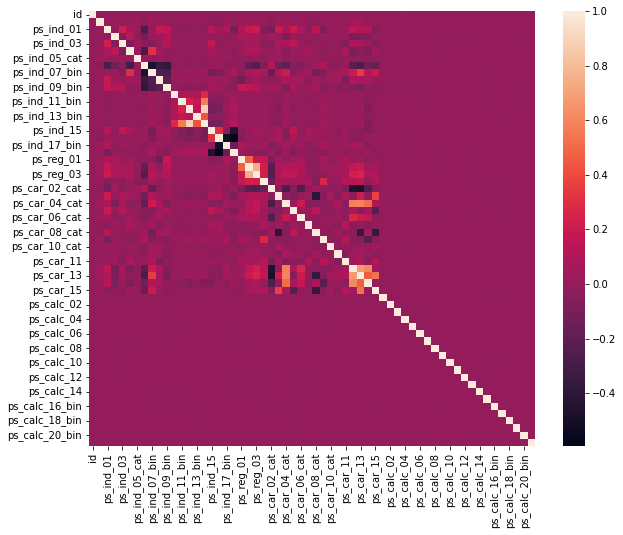

In [13]:
"""
train_set %>%
  select(-starts_with("ps_calc"), -ps_ind_10_bin, -ps_ind_11_bin, -ps_car_10_cat, -id) %>%
  mutate_at(vars(ends_with("cat")), funs(as.integer)) %>%
  mutate_at(vars(ends_with("bin")), funs(as.integer)) %>%
  mutate(target = as.integer(target)) %>%
  cor(use="complete.obs", method = "spearman") %>%
  corrplot(type="lower", tl.col = "black",  diag=FALSE)
"""

plt.figure(figsize=(10, 8))
sns.heatmap(train_set.corr())  # ignore the fact that "cat" variables are included as integers and "id" is suspect
plt.show()

## 7 Modeling

### 7.1 Train / Valid

Now that i have done the visualiztion, let's turn the model around. First, let's categorize the training data into Training / Validation data and conduct the test. Later, we will proceed with the evaluation with the test data.

In order to change the h2o model in progress, data should be adjusted to h2o through `as.h2o()` function.

In [14]:
"""
set.seed(32)

index <- sample(1:nrow(train_set), nrow(train_set) * 0.7)

tiny_train <- train_set[index, ]
train_val <- train_set[-index, ]
"""

train_set = h2o.H2OFrame(train_set)

# tiny_train, train_val = train_set.split_frame(ratios=[0.7])
test_set = h2o.H2OFrame(test_set)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
train_set.shape

(476170, 60)

In [16]:
test_set.shape

(119042, 59)

In [17]:
# tiny_train.hex = as.h2o(tiny_train)

In [18]:
# train_val.hex = as.h2o(train_val)

In [19]:
# test.hex = as.h2o(test_set)
# test_set = h2o.H2OFrame(test_set)

In [20]:
target = "target"

In [21]:
# predictors <- setdiff(names(tiny_train.hex), target)
predictors = train_set.columns
predictors.remove(target)  # remove "target"
predictors.remove("id")  # remove "id" (should not be a predictor)
predictors.remove("fold")  # remove "id" (should not be a predictor)

In [22]:
# use "asfactor()" function to convert "cat" variables to factors, not integer representations

# train_set <- train_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

# test_set <- test_set %>%
#   mutate_at(.vars = cat_vars, .funs = as.factor)

for col in cat_vars:
    test_set[col] = test_set[col].asfactor()
    
cat_vars = cat_vars + ["target"]

for col in cat_vars:
    train_set[col] = train_set[col].asfactor()

### 7.2 Modeling

Now, let's run the model using the `h2o.automl()` function, which is the core of this blog. For more information on `h2o.automl`, see:

http://docs.h2o.ai/h2o-tutorials/latest-stable/index.html

In [23]:
"""
automl_h2o_models = h2o.automl(
  x = predictors,
  y = target,
  training_frame = tiny_train,
  leaderboard_frame = train_val,
  max_runtime_secs = 100
)
"""

# automl_h2o_models = H2OAutoML(max_models=10, seed=1)
automl_h2o_models = H2OAutoML(max_runtime_secs=3600, seed=1, sort_metric="AUC")

In [24]:
automl_h2o_models.train(x=predictors, y=target, training_frame=train_set)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_4_20230706_35837

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03298828248686749
RMSE: 0.1816267669889752
LogLoss: 0.1385538948348677
Null degrees of freedom: 9852
Residual degrees of freedom: 9840
Null deviance: 3056.727655279374
Residual deviance: 2730.343051615903
AIC: 2756.343051615903
AUC: 0.7841078477603883
AUCPR: 0.20862812225274163
Gini: 0.5682156955207767

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0756269484872774: 


,,0,1,Error,Rate
0,0,9153.0,345.0,0.0363,(345.0/9498.0)
1,1,250.0,105.0,0.7042,(250.0/355.0)
2,Total,9403.0,450.0,0.0604,(595.0/9853.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.075627,0.260870,103.0
1,max f2,0.054248,0.326916,166.0
2,max f0point5,0.101188,0.291790,60.0
3,max accuracy,0.152728,0.965290,18.0
4,max precision,0.316855,1.000000,0.0
5,max recall,0.017392,1.000000,364.0
6,max specificity,0.316855,1.000000,0.0
7,max absolute_mcc,0.088071,0.234960,79.0
8,max min_per_class_accuracy,0.039671,0.709859,230.0
9,max mean_per_class_accuracy,0.043028,0.716423,212.0



Gains/Lift Table: Avg response rate:  3.60 %, avg score:  3.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010048,0.112828,11.494466,11.494466,0.414141,0.143144,0.414141,0.143144,0.115493,0.115493,1049.446578,1049.446578,0.109386
1,2,0.020095,0.095005,7.008821,9.251643,0.252525,0.103389,0.333333,0.123267,0.070423,0.185915,600.882060,825.164319,0.172018
2,3,0.030042,0.084191,4.531417,7.688866,0.163265,0.089759,0.277027,0.112173,0.045070,0.230986,353.141707,668.886563,0.208455
3,4,0.040089,0.077813,3.364234,6.604971,0.121212,0.080582,0.237975,0.104255,0.033803,0.264789,236.423389,560.497058,0.233098
4,5,0.050036,0.073534,4.531417,6.192783,0.163265,0.075632,0.223124,0.098565,0.045070,0.309859,353.141707,519.278348,0.269535
5,6,0.100071,0.060060,2.364517,4.278650,0.085193,0.065833,0.154158,0.082199,0.118310,0.428169,136.451733,327.865040,0.340361
6,7,0.150005,0.052105,1.918024,3.492840,0.069106,0.055768,0.125846,0.073401,0.095775,0.523944,91.802359,249.283958,0.387915
7,8,0.200041,0.046659,1.407451,2.971228,0.050710,0.049335,0.107052,0.067381,0.070423,0.594366,40.745079,197.122787,0.409064
8,9,0.300010,0.039817,1.070749,2.337949,0.038579,0.042939,0.084235,0.059237,0.107042,0.701408,7.074855,133.794907,0.416401
9,10,0.399980,0.035090,0.845328,1.964888,0.030457,0.037322,0.070794,0.053759,0.084507,0.785915,-15.467220,96.488844,0.400361




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.034770914327726894
RMSE: 0.18646960698120993
LogLoss: 0.15214424835315307
Null degrees of freedom: 476169
Residual degrees of freedom: 476157
Null deviance: 149054.54209896555
Residual deviance: 144893.05347664183
AIC: 144919.05347664183
AUC: 0.636876701124411
AUCPR: 0.06518821617580496
Gini: 0.27375340224882194

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0563606782238855: 


,,0,1,Error,Rate
0,0,406941.0,51870.0,0.1131,(51870.0/458811.0)
1,1,13063.0,4296.0,0.7525,(13063.0/17359.0)
2,Total,420004.0,56166.0,0.1364,(64933.0/476170.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.056361,0.116858,190.0
1,max f2,0.038862,0.197330,260.0
2,max f0point5,0.072410,0.096786,147.0
3,max accuracy,0.327640,0.963553,9.0
4,max precision,0.506689,1.000000,0.0
5,max recall,0.010102,1.000000,397.0
6,max specificity,0.506689,1.000000,0.0
7,max absolute_mcc,0.051387,0.079525,207.0
8,max min_per_class_accuracy,0.035141,0.595062,278.0
9,max mean_per_class_accuracy,0.034152,0.598528,283.0



Gains/Lift Table: Avg response rate:  3.65 %, avg score:  3.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.107850,3.369797,3.369797,0.122848,0.134305,0.122848,0.134305,0.033700,0.033700,236.979749,236.979749,0.024596
1,2,0.020001,0.092235,2.580631,2.975214,0.094078,0.099116,0.108463,0.116710,0.025808,0.059508,158.063124,197.521436,0.041002
2,3,0.030002,0.083412,2.281094,2.743841,0.083158,0.087498,0.100028,0.106973,0.022812,0.082320,128.109368,174.384080,0.054298
3,4,0.040000,0.077438,2.056872,2.572126,0.074984,0.080227,0.093768,0.100288,0.020566,0.102886,105.687245,157.212577,0.065265
4,5,0.050001,0.072775,2.246532,2.507004,0.081898,0.075012,0.091394,0.095232,0.022467,0.125353,124.653166,150.700421,0.078203
5,6,0.100000,0.059246,1.829637,2.168328,0.066700,0.065117,0.079047,0.080175,0.091480,0.216833,82.963690,116.832767,0.121253
6,7,0.150001,0.051919,1.562269,1.966305,0.056953,0.055321,0.071683,0.071890,0.078115,0.294948,56.226917,96.630534,0.150431
7,8,0.200000,0.046903,1.353793,1.813180,0.049353,0.049258,0.066100,0.066232,0.067688,0.362636,35.379305,81.318048,0.168789
8,9,0.300000,0.040218,1.187856,1.604739,0.043304,0.043325,0.058502,0.058597,0.118786,0.481422,18.785644,60.473914,0.188286
9,10,0.400000,0.035543,1.057089,1.467826,0.038537,0.037763,0.053510,0.053388,0.105709,0.587131,5.708854,46.782649,0.194211


In [25]:
automl_h2o_models.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_4_20230706_35837,0.636877,0.152144,0.0651882,0.432787,0.18647,0.0347709
StackedEnsemble_AllModels_3_AutoML_4_20230706_35837,0.636803,0.152136,0.0652781,0.432878,0.186464,0.0347688
StackedEnsemble_BestOfFamily_3_AutoML_4_20230706_35837,0.636106,0.152183,0.0650072,0.438651,0.186478,0.034774
StackedEnsemble_AllModels_1_AutoML_4_20230706_35837,0.635262,0.152297,0.0634832,0.437003,0.18653,0.0347933
StackedEnsemble_BestOfFamily_2_AutoML_4_20230706_35837,0.634105,0.152356,0.0631844,0.426739,0.186544,0.0347987
StackedEnsemble_BestOfFamily_1_AutoML_4_20230706_35837,0.632232,0.15251,0.0622465,0.438022,0.18658,0.034812
XGBoost_3_AutoML_4_20230706_35837,0.628951,0.152717,0.0629032,0.435784,0.186627,0.0348296
GLM_1_AutoML_4_20230706_35837,0.628814,0.1527,0.06146,0.437894,0.18662,0.0348272
GBM_5_AutoML_4_20230706_35837,0.628251,0.153043,0.0611102,0.443109,0.18688,0.0349239
GBM_2_AutoML_4_20230706_35837,0.62531,0.153208,0.0598086,0.436673,0.18688,0.034924


In [26]:
automl_h2o_models.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_4_20230706_35837

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03298828248686749
RMSE: 0.1816267669889752
LogLoss: 0.1385538948348677
Null degrees of freedom: 9852
Residual degrees of freedom: 9840
Null deviance: 3056.727655279374
Residual deviance: 2730.343051615903
AIC: 2756.343051615903
AUC: 0.7841078477603883
AUCPR: 0.20862812225274163
Gini: 0.5682156955207767

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0756269484872774: 


,,0,1,Error,Rate
0,0,9153.0,345.0,0.0363,(345.0/9498.0)
1,1,250.0,105.0,0.7042,(250.0/355.0)
2,Total,9403.0,450.0,0.0604,(595.0/9853.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.075627,0.260870,103.0
1,max f2,0.054248,0.326916,166.0
2,max f0point5,0.101188,0.291790,60.0
3,max accuracy,0.152728,0.965290,18.0
4,max precision,0.316855,1.000000,0.0
5,max recall,0.017392,1.000000,364.0
6,max specificity,0.316855,1.000000,0.0
7,max absolute_mcc,0.088071,0.234960,79.0
8,max min_per_class_accuracy,0.039671,0.709859,230.0
9,max mean_per_class_accuracy,0.043028,0.716423,212.0



Gains/Lift Table: Avg response rate:  3.60 %, avg score:  3.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010048,0.112828,11.494466,11.494466,0.414141,0.143144,0.414141,0.143144,0.115493,0.115493,1049.446578,1049.446578,0.109386
1,2,0.020095,0.095005,7.008821,9.251643,0.252525,0.103389,0.333333,0.123267,0.070423,0.185915,600.882060,825.164319,0.172018
2,3,0.030042,0.084191,4.531417,7.688866,0.163265,0.089759,0.277027,0.112173,0.045070,0.230986,353.141707,668.886563,0.208455
3,4,0.040089,0.077813,3.364234,6.604971,0.121212,0.080582,0.237975,0.104255,0.033803,0.264789,236.423389,560.497058,0.233098
4,5,0.050036,0.073534,4.531417,6.192783,0.163265,0.075632,0.223124,0.098565,0.045070,0.309859,353.141707,519.278348,0.269535
5,6,0.100071,0.060060,2.364517,4.278650,0.085193,0.065833,0.154158,0.082199,0.118310,0.428169,136.451733,327.865040,0.340361
6,7,0.150005,0.052105,1.918024,3.492840,0.069106,0.055768,0.125846,0.073401,0.095775,0.523944,91.802359,249.283958,0.387915
7,8,0.200041,0.046659,1.407451,2.971228,0.050710,0.049335,0.107052,0.067381,0.070423,0.594366,40.745079,197.122787,0.409064
8,9,0.300010,0.039817,1.070749,2.337949,0.038579,0.042939,0.084235,0.059237,0.107042,0.701408,7.074855,133.794907,0.416401
9,10,0.399980,0.035090,0.845328,1.964888,0.030457,0.037322,0.070794,0.053759,0.084507,0.785915,-15.467220,96.488844,0.400361




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.034770914327726894
RMSE: 0.18646960698120993
LogLoss: 0.15214424835315307
Null degrees of freedom: 476169
Residual degrees of freedom: 476157
Null deviance: 149054.54209896555
Residual deviance: 144893.05347664183
AIC: 144919.05347664183
AUC: 0.636876701124411
AUCPR: 0.06518821617580496
Gini: 0.27375340224882194

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0563606782238855: 


,,0,1,Error,Rate
0,0,406941.0,51870.0,0.1131,(51870.0/458811.0)
1,1,13063.0,4296.0,0.7525,(13063.0/17359.0)
2,Total,420004.0,56166.0,0.1364,(64933.0/476170.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.056361,0.116858,190.0
1,max f2,0.038862,0.197330,260.0
2,max f0point5,0.072410,0.096786,147.0
3,max accuracy,0.327640,0.963553,9.0
4,max precision,0.506689,1.000000,0.0
5,max recall,0.010102,1.000000,397.0
6,max specificity,0.506689,1.000000,0.0
7,max absolute_mcc,0.051387,0.079525,207.0
8,max min_per_class_accuracy,0.035141,0.595062,278.0
9,max mean_per_class_accuracy,0.034152,0.598528,283.0



Gains/Lift Table: Avg response rate:  3.65 %, avg score:  3.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.107850,3.369797,3.369797,0.122848,0.134305,0.122848,0.134305,0.033700,0.033700,236.979749,236.979749,0.024596
1,2,0.020001,0.092235,2.580631,2.975214,0.094078,0.099116,0.108463,0.116710,0.025808,0.059508,158.063124,197.521436,0.041002
2,3,0.030002,0.083412,2.281094,2.743841,0.083158,0.087498,0.100028,0.106973,0.022812,0.082320,128.109368,174.384080,0.054298
3,4,0.040000,0.077438,2.056872,2.572126,0.074984,0.080227,0.093768,0.100288,0.020566,0.102886,105.687245,157.212577,0.065265
4,5,0.050001,0.072775,2.246532,2.507004,0.081898,0.075012,0.091394,0.095232,0.022467,0.125353,124.653166,150.700421,0.078203
5,6,0.100000,0.059246,1.829637,2.168328,0.066700,0.065117,0.079047,0.080175,0.091480,0.216833,82.963690,116.832767,0.121253
6,7,0.150001,0.051919,1.562269,1.966305,0.056953,0.055321,0.071683,0.071890,0.078115,0.294948,56.226917,96.630534,0.150431
7,8,0.200000,0.046903,1.353793,1.813180,0.049353,0.049258,0.066100,0.066232,0.067688,0.362636,35.379305,81.318048,0.168789
8,9,0.300000,0.040218,1.187856,1.604739,0.043304,0.043325,0.058502,0.058597,0.118786,0.481422,18.785644,60.473914,0.188286
9,10,0.400000,0.035543,1.057089,1.467826,0.038537,0.037763,0.053510,0.053388,0.105709,0.587131,5.708854,46.782649,0.194211


In [27]:
# Predict on test set
pred_conversion = automl_h2o_models.predict(test_set)
pred_conversion = pred_conversion.as_data_frame()
pred_conversion.info()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119042 entries, 0 to 119041
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   predict  119042 non-null  int64  
 1   p0       119042 non-null  float64
 2   p1       119042 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.7 MB


In [28]:
pred_conversion.head()

,predict,p0,p1
0,0,0.951143,0.048857
1,0,0.961793,0.038207
2,0,0.977799,0.022201
3,0,0.986561,0.013439
4,0,0.979761,0.020239


In [29]:
Submission = pd.concat([test_set["id"].as_data_frame(), pred_conversion], axis=1)
Submission.head()

,id,predict,p0,p1
0,7,0,0.951143,0.048857
1,19,0,0.961793,0.038207
2,46,0,0.977799,0.022201
3,61,0,0.986561,0.013439
4,65,0,0.979761,0.020239


In [30]:
Submission.to_csv("Submission_AutoML_Py.csv", index=False)

## 8 Review

Knowing `h2o.automl` gave a change to apply it in R.

The process of researching what `h2o.automl` was difficult. It took quite a long time to figure out how h2o goes in R and automl goes.

This is the challenge to me, how can we use these technologies? It was a matter of doing. At some point, I didn't like to study in a textbook style, but it feels like I'm studying 100 and writing about 10 in practice. So I thought about how I could use it in the actual. Kaggle. There was not much data in the Kaggle, and it took a long time to find the appropriate topic and classification data that looked like I could do with `ho2.automl()` right away.

I've really tried something new. I didn't just listen to it somewhere, but I studied unfamiliar things from the beginning and prepared that, and now I'm going to pile up one by one.